This section reads all the molecules and generates a dataframe with each smile with its respective classes

In [220]:
import pandas as pd
from rdkit import Chem
import matplotlib.pyplot as plt
import seaborn as sns

with open("chebi_smiles_com_classes.txt", "r") as f:
    smiles = [i.strip().split(' ') for i in f.readlines()]
    f.close()

molecules_by_classes = []
for s in smiles:
    molecules_by_classes.append({"canonical_smiles":s[0],"classes":s[1].split("@")})

df = pd.DataFrame.from_dict(molecules_by_classes)

smiles = [i["canonical_smiles"] for i in molecules_by_classes]

In [200]:
# Validity test
# import time

# for smile in smiles:
#     response = Chem.MolFromSmiles(smile)
#     print(response)
#     time.sleep(5)

In [222]:
# Index of the longest SMILES string
longest_smiles = max(df["canonical_smiles"], key=len)
longest_smiles_index = df.canonical_smiles[df.canonical_smiles == longest_smiles].index.tolist()
print(f"Longest SMILES: {longest_smiles}")
print(f"Contains {len(longest_smiles)} characters, index in dataframe: {longest_smiles_index[0]}.")
smiles_maxlen = len(longest_smiles)
# NBVAL_CHECK_OUTPUT

Longest SMILES: COc1ccc(cc1)[C@@H]1CC(=O)c2c(O)cc(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)[C@H]3O[C@@H]3O[C@@H](C)[C@H](O)[C@@H](O)[C@H]3O)cc2O1
Contains 123 characters, index in dataframe: 130.


In [202]:
# Index of the shortest SMILES string
shortest_smiles = min(df["canonical_smiles"], key=len)
shortest_smiles_index = df.canonical_smiles[df.canonical_smiles == shortest_smiles].index.tolist()
print(f"Shortest SMILES: {shortest_smiles}")
print(
    f"Contains {len(shortest_smiles)} characters, index in dataframe: {shortest_smiles_index[0]}."
)
# NBVAL_CHECK_OUTPUT

Shortest SMILES: NO
Contains 2 characters, index in dataframe: 7251.


In [224]:
classes = df['classes'].explode()

set_classes = list(set(classes))
print(f"There are {len(set_classes)} different classes from {len(classes)} set in the data.")

There are 8446 different classes from 18326 set in the data.


In [226]:
new_data = []
for row in df['classes']:
    new_row = [1 if elem in row else 0 for elem in set_classes]
    new_data.append(new_row)

one_hot_classes = pd.DataFrame(new_data, columns=set_classes)

In [205]:
one_hot_classes

,CHEBI_50995,CHEBI_24689,CHEBI_75771,CHEBI_24828,CHEBI_35481,CHEBI_27311,CHEBI_35442,CHEBI_57643,CHEBI_29067,CHEBI_48888,...,CHEBI_61379,CHEBI_25676,CHEBI_47778,CHEBI_17984,CHEBI_22723,CHEBI_25212,CHEBI_22798,CHEBI_22562,CHEBI_37739,CHEBI_59174
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
from collections import Counter

contagem = Counter(classes)

item_mais_comum = contagem.most_common(1)[0]
print(f'O item mais comum é: {item_mais_comum[0]}, ocorrendo {item_mais_comum[1]} vezes. Correspondendo a {100*item_mais_comum[1]/len(classes)}% do dataset.')

item_menos_comum = contagem.most_common()[:-2:-1][0]
print(f'O item menos comum é: {item_menos_comum[0]}, ocorrendo {item_menos_comum[1]} vez.')

O item mais comum é: CHEBI_35610, ocorrendo 1309 vezes. Correspondendo a 7.142857142857143% do dataset.
O item menos comum é: O[C@@H]([C@H](NC(=O)[C@@H](N)CCC(=O)N)C(=O)N[C@@H](CC(O)=O)C(O)=O)C, ocorrendo 1 vez.


Encontrando classes amostragem baixa

In [228]:
threshold = 1.5

less_than_threshold = [element for element, count in contagem.items() if (count / len(classes)) * 100 < threshold]
print(f'There are {len(less_than_threshold)} elements corresponding to less than {threshold}% of the dataset: {less_than_threshold}')

There are 8439 elements corresponding to less than 1.5% of the dataset: ['CC(C)C(=O)c1c(O)c2c(cc(=O)oc2c2cc(oc12)C(C)(C)O)-c1ccccc1', '[H][C@]12C[C@H](OC(=O)c3ccccc3)[C@]3(C)[C@@H](OC(C)=O)[C@H](C[C@@H](C)[C@@]3(OC1(C)C)[C@@H]2OC(=O)c1ccoc1)OC(C)=O', 'Oc1ccc2c(c1)oc(-c1cc(O)c(O)c(O)c1)c(O)c2=O', 'O=C(N[C@@H](CCCCN)C(=O)N[C@@H](CO)C(O)=O)[C@@H](N)[C@H](CC)C', 'SC[C@H](NC(=O)[C@@H](N)C(C)C)C(=O)N[C@@H](C)C(O)=O', '[H][C@@]1(C[C@H]2OO[C@@H]1C=C2C)[C@@H](C)CCC=C(C)C', 'N[C@@H](CCC(=O)N[C@@H](CC#N)C(O)=O)C(O)=O', '[H][C@@]12C[C@@H](O[C@@H](C)[C@@]3([H])O[C@]3([H])C[C@H](Br)[C@]([H])(C[C@H]1Cl)O2)\\C=C\\C(=O)OC', 'C[C@@H](C=O)C(O)=O', 'O[C@@H]1[C@H](O)[C@H](O)[C@@H](OP(O)(O)=O)[C@H](O)[C@H]1O', 'C[N+](C)(C)CCOP([O-])(=O)OC[C@@H](CO[*])O[*]', 'CC[C@H](C)[C@H](N)C(=O)N[C@@H]([C@@H](C)CC)C(O)=O', '[H][C@@]12CC=C3C[C@@H](O)CC[C@]3(C)[C@@]1([H])CC[C@@]1(C)[C@@]2([H])CC[C@]1(O)[C@](C)(O)CCCC(C)C', 'C1=2C(=NC(CN1)C(C(C)O)O)C(N=C(N2)N)=O', 'O=C(N[C@@H](CCC(O)=O)C(O)=O)[C@@H](NC(=O)[C@@H](N)CC1=CC=CC

In [229]:
import statistics

contagens_classes = list(contagem.values())

contagens_classes.sort()

mediana_contagens = statistics.median(contagens_classes)

print(f"A mediana da quantidade de repetições dos itens é: {mediana_contagens}")

A mediana da quantidade de repetições dos itens é: 1.0


In [230]:
print(f"The max number of classes for smile is: {max(one_hot_classes.sum(axis=1))}")

The max number of classes for smile is: 2


In [231]:
df_selected = df.copy()
df_selected['classes'] = df_selected['classes'].apply(lambda x: [elem for elem in x if elem not in less_than_threshold])
df_selected = df_selected[df_selected['classes'].astype(bool)]
df_selected.reset_index(drop=True, inplace=True)
df_selected

,smile,classe
0,CC(C)C(=O)c1c(O)c2c(cc(=O)oc2c2cc(oc12)C(C)(C)...,[CHEBI_35610]
1,[H][C@]12C[C@H](OC(=O)c3ccccc3)[C@]3(C)[C@@H](...,[CHEBI_35610]
2,Oc1ccc2c(c1)oc(-c1cc(O)c(O)c(O)c1)c(O)c2=O,[CHEBI_76924]
3,O=C(N[C@@H](CCCCN)C(=O)N[C@@H](CO)C(O)=O)[C@@H...,[CHEBI_16670]
4,SC[C@H](NC(=O)[C@@H](N)C(C)C)C(=O)N[C@@H](C)C(...,[CHEBI_16670]
...,...,...
9158,COc1ccc(cc1)C([O-])=O,[CHEBI_76924]
9159,O=C(N[C@@H](CCC(O)=O)C(O)=O)[C@@H](NC(=O)[C@@H...,[CHEBI_16670]
9160,O=C(N[C@@H]([C@H](O)C)C(O)=O)[C@@H](NC(=O)[C@@...,[CHEBI_16670]
9161,COC(=O)C(C)C,[CHEBI_25212]


In [232]:
import numpy as np

df_selected['string_size'] = df_selected['canonical_smiles'].apply(len)
median_size = np.median(df_selected['string_size'])

Q1 = df_selected['string_size'].quantile(0.25)
Q3 = df_selected['string_size'].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 0.2 * IQR

df_filtered = df_selected[(df_selected['string_size'] >= Q1 + outlier_threshold) & (df_selected['string_size'] <= Q3 + outlier_threshold)]

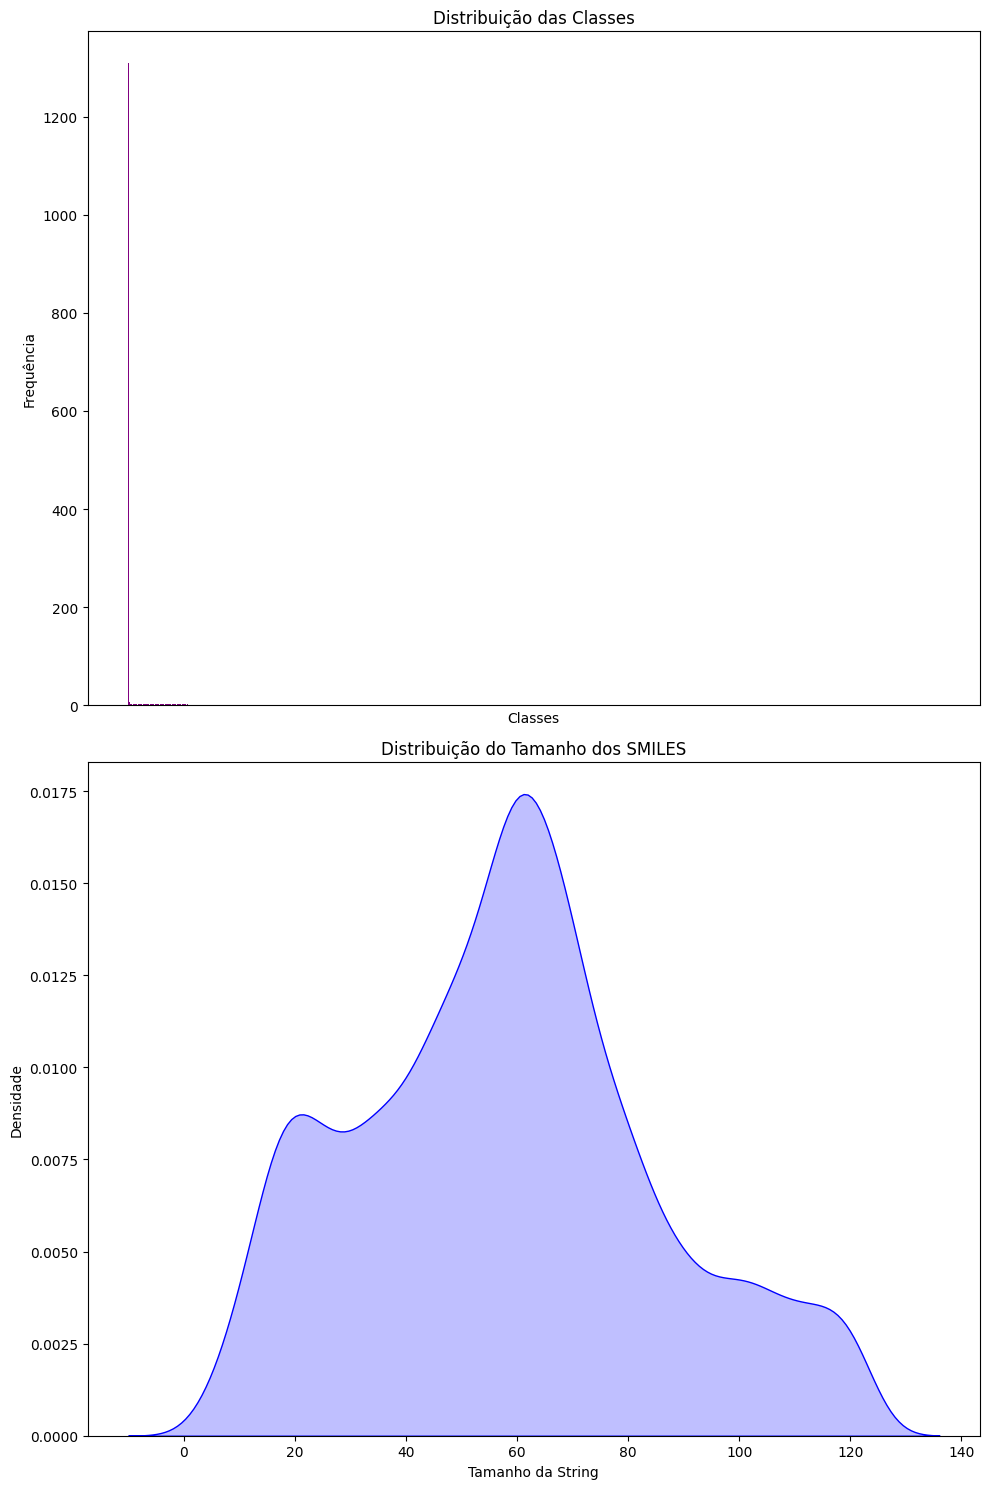

In [235]:
contagem = Counter(classes)

# Extraindo informações para o gráfico
categorias, frequencias = zip(*contagem.items())

# Ordenando as categorias com base nas frequências
categorias_ordenadas, frequencias_ordenadas = zip(*sorted(zip(categorias, frequencias), key=lambda x: x[1], reverse=True))

soma_por_linha = one_hot_classes.sum(axis=1)

# Criando uma figura com três subgráficos
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# Subgráfico 1: Distribuição das Classes
axs[0].bar(categorias_ordenadas, frequencias_ordenadas, color='purple')
axs[0].set_title('Distribuição das Classes')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Frequência')
axs[0].set_xticks([]) 

# Subgráfico 2: Distribuição do Tamanho dos SMILES (usando KDE plot)
sns.kdeplot(data=df_selected['string_size'], fill=True, color='blue', ax=axs[1])
axs[1].set_title('Distribuição do Tamanho dos SMILES')
axs[1].set_xlabel('Tamanho da String')
axs[1].set_ylabel('Densidade')

# Ajustando o layout
plt.tight_layout()

plt.savefig('initial_data_distribution.png')

In [213]:
Q1, Q3, IQR, outlier_threshold

(48.0, 78.0, 30.0, 6.0)

In [219]:
print(f"{len(df_filtered)} SMILES left.\nMax size: {Q3 + outlier_threshold}\nMin size: {Q1 + outlier_threshold}")

9574 SMILES left.
Max size: 84.0
Min size: 42.0


In [240]:
almost_final_dict = []

for i, row in df_filtered.iterrows():
    for classe in row['classes']:
        almost_final_dict.append({'smile':row['canonical_smiles'], 'classe':classe})

almost_final_df = pd.DataFrame(almost_final_dict)
almost_final_df

,smile,classe
0,CC(C)C(=O)c1c(O)c2c(cc(=O)oc2c2cc(oc12)C(C)(C)...,CHEBI_35610
1,[H][C@]12C[C@H](OC(=O)c3ccccc3)[C@]3(C)[C@@H](...,CHEBI_35610
2,Oc1ccc2c(c1)oc(-c1cc(O)c(O)c(O)c1)c(O)c2=O,CHEBI_76924
3,O=C(N[C@@H](CCCCN)C(=O)N[C@@H](CO)C(O)=O)[C@@H...,CHEBI_16670
4,SC[C@H](NC(=O)[C@@H](N)C(C)C)C(=O)N[C@@H](C)C(...,CHEBI_16670
...,...,...
9158,COc1ccc(cc1)C([O-])=O,CHEBI_76924
9159,O=C(N[C@@H](CCC(O)=O)C(O)=O)[C@@H](NC(=O)[C@@H...,CHEBI_16670
9160,O=C(N[C@@H]([C@H](O)C)C(O)=O)[C@@H](NC(=O)[C@@...,CHEBI_16670
9161,COC(=O)C(C)C,CHEBI_25212


In [242]:
min_class_count = almost_final_df['classe'].value_counts().min()

grouped_df = almost_final_df.groupby('classe', group_keys=False)

full_df = grouped_df.apply(lambda x: x.sample(min_class_count))

full_df = full_df.sample(frac=1)

full_df.reset_index(drop=True, inplace=True)

to_txt = full_df[['smile', 'classe']]

# with open('dense_chebi_selected_smiles.txt', 'w') as f:
#     for i, row in to_txt.iterrows():
#         f.write(f"{row['smile']} {row['classe']}\n")
# f.close()

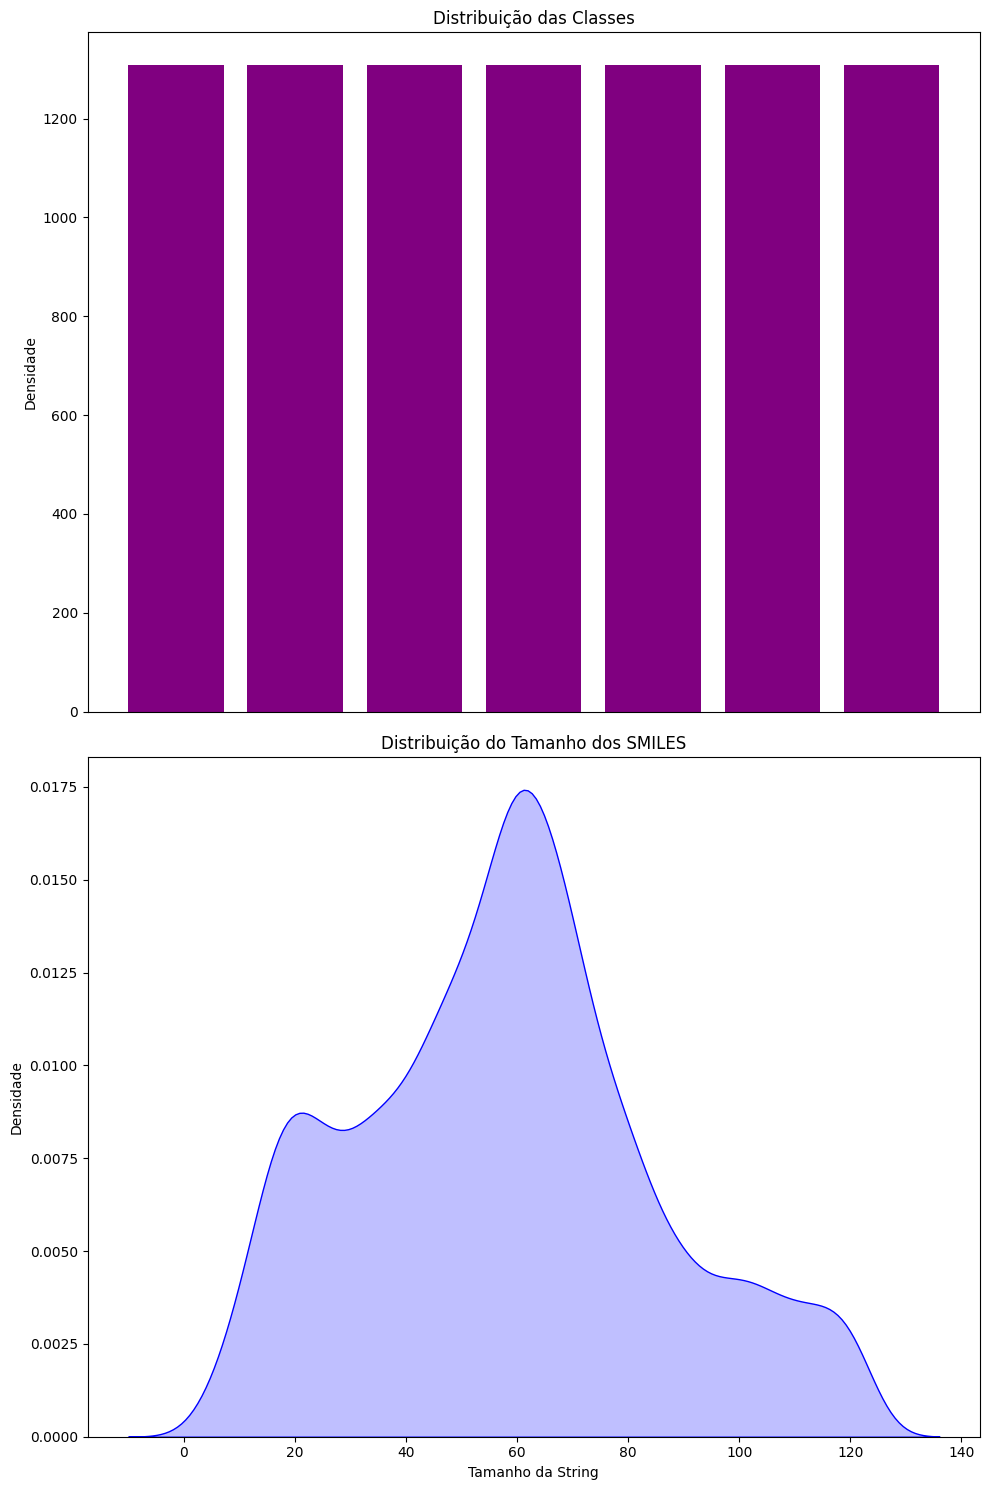

In [243]:
contagem = Counter(full_df['classe'].explode())
full_df['string_size'] = full_df['smile'].apply(len)
new_data = []
for row in full_df['classe']:
    new_row = [1 if elem in row else 0 for elem in set_classes]
    new_data.append(new_row)

one_hot_classes = pd.DataFrame(new_data, columns=set_classes)
soma_por_linha = one_hot_classes.sum(axis=1)

# Extraindo informações para o gráfico
categorias, frequencias = zip(*contagem.items())

# Ordenando as categorias com base nas frequências
categorias_ordenadas, frequencias_ordenadas = zip(*sorted(zip(categorias, frequencias), key=lambda x: x[1], reverse=True))

# Criando uma figura com três subgráficos
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

axs[0].bar(categorias_ordenadas, frequencias_ordenadas, color='purple')
axs[0].set_title('Distribuição das Classes')
axs[0].set_ylabel('Densidade')
axs[0].set_xticks([]) 

# Subgráfico 2: Distribuição do Tamanho dos SMILES (usando KDE plot)
sns.kdeplot(data=full_df['string_size'], fill=True, color='blue', ax=axs[1])
axs[1].set_title('Distribuição do Tamanho dos SMILES')
axs[1].set_xlabel('Tamanho da String')
axs[1].set_ylabel('Densidade')

# Ajustando o layout
plt.tight_layout()

plt.savefig('sparse_dataset_distribution.png')